# Análise do Negócio
- O objetivo desse projeto é analisar todas os resultados e informações de uma empresa focada em estética automotiva.

- Os dados foram coletados a partir do sistema CRM que foi implementado recentemente.

- A quantidade de dados ainda é baixa, mas já é possível realizar análises poderosas e observar as tendências.
#### *A utilização dos dados foi autorizada pelos responsáveis.

## Importando as Bibliotecas

In [1]:
import pandas as pd
import seaborn as srn
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

## Importando os Dados

In [2]:
dados = pd.read_csv("TR Estética Automotiva.csv", 
          sep = ",", 
          parse_dates = ["dtatendimento", "dtfechamento"], 
          dayfirst = True)

#Visulizando
dados.head()

,ID,nome,responsavel,origem,temperatura,situacao,dtatendimento,dtfechamento,categoria,restauracao,...,polimento,vitrificacao,lavagemmotor,tratamentovidros,protecaopintura,lavagemdetalhada,lavagemmoto,outros,descontos,total
0,345zYB2RStaeNDSoFPrKCQ,Tintin,Victor,Outros,Quente,FECHADO,2022-07-20 10:48:31,2022-07-20 14:46:05,Pequeno,NaN,...,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,10.0,90.0
1,kodJrgZQQbOYocrI4wEXug,Victor Luiz,Victor,Outros,Quente,FECHADO,2022-07-20 11:09:29,2022-07-29 14:47:14,Médio,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0
2,9XlS0WWDTQ6xUnyp3EcXyg,Wesley,Victor,Indicação,Quente,FECHADO,2022-07-21 12:39:29,2022-07-21 13:50:40,Médio,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,40.0
3,a-ihIurH5Q9ipdAPzY3AeBw,Diogo,Victor,Outros,Quente,FECHADO,2022-07-21 13:50:48,2022-07-21 17:52:51,Pequeno,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,40.0
4,EnbNzP.8Qs-K3r-gQI3IOQ,Rubem Borges,Victor,Outros,Quente,FECHADO,2022-07-21 13:51:48,2022-07-21 17:52:59,Médio,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0


# Tratando Valores Nulos

In [15]:
dados.fillna(0, inplace = True)
dados.isnull().sum()

ID                  0
nome                0
responsavel         0
origem              0
temperatura         0
situacao            0
dtatendimento       0
dtfechamento        0
categoria           0
restauracao         0
higienizacao        0
lavagem             0
polimento           0
vitrificacao        0
lavagemmotor        0
tratamentovidros    0
protecaopintura     0
lavagemdetalhada    0
lavagemmoto         0
outros              0
descontos           0
total               0
dtype: int64

## Tamanho dos Dados

In [4]:
dados.shape
# Nº de Linhas e Colunas

(73, 22)

## Verificando os Tipos de Dados

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                73 non-null     object        
 1   nome              73 non-null     object        
 2   responsavel       73 non-null     object        
 3   origem            73 non-null     object        
 4   temperatura       73 non-null     object        
 5   situacao          73 non-null     object        
 6   dtatendimento     73 non-null     datetime64[ns]
 7   dtfechamento      73 non-null     object        
 8   categoria         73 non-null     object        
 9   restauracao       73 non-null     float64       
 10  higienizacao      73 non-null     float64       
 11  lavagem           73 non-null     float64       
 12  polimento         73 non-null     float64       
 13  vitrificacao      73 non-null     float64       
 14  lavagemmotor      73 non-nul

# Dados Categóricos

In [6]:
# Origem
origem = dados.groupby(['origem']).size()
origem

origem
Indicação     13
Instagram      2
Luminoso       5
Outros        35
Recorrente    18
dtype: int64

In [7]:
# Temperatura
temperatura = dados.groupby(['temperatura']).size()
temperatura

temperatura
Morno      5
Quente    68
dtype: int64

In [8]:
# Situação
situacao = dados.groupby(['situacao']).size()
situacao

situacao
EM ABERTO     8
FECHADO      65
dtype: int64

In [9]:
# Responsável
responsavel = dados.groupby(['responsavel']).size()
responsavel

responsavel
Gabriel    30
Victor     43
dtype: int64

# Key Perfomance Indicator (KPI)

## Origem dos Leads
Quais são os canais mais utilizados pelos Leads?

Text(0, 0.5, 'Quantidade')

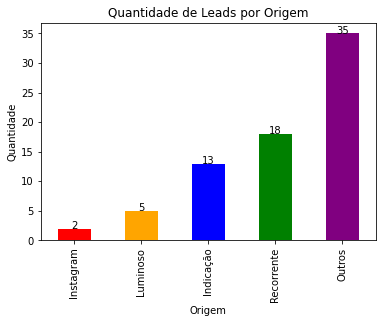

In [10]:
#Agrupando as origens
origem = dados.groupby(['origem']).size()

#Ordenando os dados em ordem crescente
origem = origem.sort_values()

#Função para adicionar os rótulos de valor
def labelorigem(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
x = origem
y = origem

#Gerando o gráfico e alterando as cores
grafico = origem.plot.bar(color=['red', 'orange', 'blue', 'green', 'purple'])

#Títulos e nome dos eixos
labelorigem(x, y)
plt.title('Quantidade de Leads por Origem')
plt.xlabel('Origem')
plt.ylabel('Quantidade')

#### Conclusão

Devido a grande quantidade de Leads de origem "Outros", podemos observar o seguinte:

- Existem um grande volume de Leads em possíveis canais não mapeados.
- E/Ou, essa informação não está sendo obtida como deveria no momento da atendimento.
    
Com a falta de clareza nas informações, podemos concluir que os novos esforços deveriam ser direcionados à identificação desses canais e na realização de treinamentos à equipe de vendas para reforçar a importância da origem dos clientes para a tomada de decisões.

## Conversão por Origem
Quais canais possuem uma maior taxa de conversão?

Text(0, 0.5, 'Taxa de Conversão')

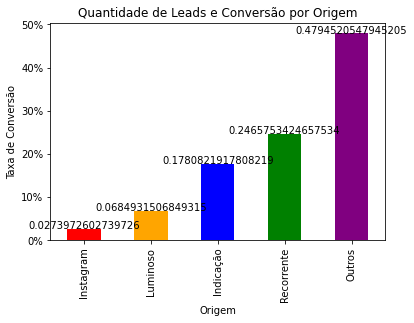

In [11]:
#Calculando a taxa de conversão por origem
taxa = ((dados.situacao == "FECHADO").sum() and dados.groupby(['origem']).size())/dados.ID.count()

#Ordenando os dados em ordem crescente
taxa = taxa.sort_values()

#Função para adicionar os rótulos de valor
def labeltaxa(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
x = taxa
y = taxa

#Gerando o gráfico e alterando as cores
grafico = taxa.plot.bar(color=['red', 'orange', 'blue', 'green', 'purple'])

#Convertendo o formato do eixo "y" para percentual
grafico.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

#Títulos e nome dos eixos
labeltaxa(x, y)
plt.title('Quantidade de Leads e Conversão por Origem')
plt.xlabel('Origem')
plt.ylabel('Taxa de Conversão')

## Temperatura dos Leads
Qual o nível de interesse dos Leads pelos serviços prestados?
- Frio: Pouco Interessado
- Morno: Interesse Médio
- Quente: Muito Interessado

Text(0, 0.5, 'Quantidade')

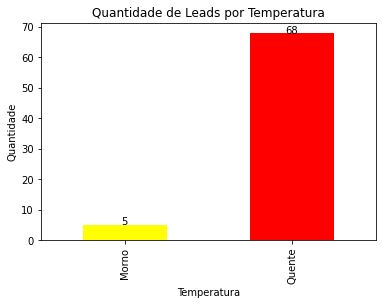

In [18]:
#Agrupando as temperaturas
temperatura = dados.groupby(['temperatura']).size()

#Ordenando os dados em ordem crescente
temperatura = temperatura.sort_values()

#Função para adicionar os rótulos de valor
def labeltemperatura(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
x = temperatura
y = temperatura

#Gerando o gráfico e alterando as cores
grafico = temperatura.plot.bar(color=['yellow', 'red'])

#Títulos e nome dos eixos
labeltemperatura(x, y)
plt.title('Quantidade de Leads por Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Quantidade')

Todos os Leads foram classificados como "Quentes". Isso pode ser positivo a partir de uma boa taxa de conversão, ou, novamente os vendedores não estão conseguindo obter e registrar as informações como deveriam.

## Vendas
Quantidade de Leads que fecharam ou não algum tipo de serviço.

Text(0, 0.5, 'Quantidade')

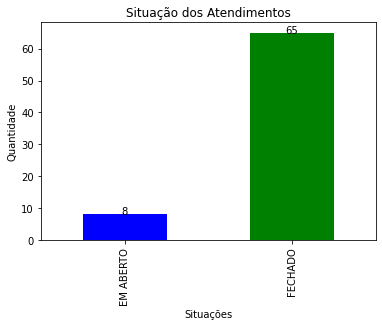

In [20]:
#Agrupando as situações
situacao = dados.groupby(['situacao']).size()

#Ordenando os dados em ordem crescente
situacao = situacao.sort_values()

#Função para adicionar os rótulos de valor
def labelsituacao(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
x = situacao
y = situacao

#Gerando o gráfico e alterando as cores
grafico = situacao.plot.bar(color=['blue', 'green'])

#Títulos e nome dos eixos
labelsituacao(x, y)
plt.title('Situação dos Atendimentos')
plt.xlabel('Situações')
plt.ylabel('Quantidade')

Existe um volume muito maior de clientes que adquiriram algum tipo de serviço em relação a quantidade de atendimentos, isso pode representar uma ótima taxa de conversão.

## Taxa de Conversão
Percentual de fechamentos sobre a quantidade de atendimentos.

In [14]:
taxa = ((dados.situacao == "FECHADO").sum())/(dados.ID.count())

# Conversão para Percentual
"{: .2%}". format(taxa)

' 89.04%'

Confirmando o resultado do gráfico anterior, podemos ter o entendimento que a empresa está conseguindo fechar com quase todos os seus clientes, realmente uma ótima taxa de conversão.